In [1]:
#computer vision with tensorflow

import tensorflow as tf


In [2]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2024-01-25 07:10:20--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.188.207, 64.233.189.207, 142.250.157.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.188.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  28.1MB/s    in 4.6s    

2024-01-25 07:10:25 (23.0 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [3]:
##inspect the data (become one with it)

!ls pizza_steak

test  train


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [5]:
import os

for dirpath,dirname,filename in os.walk("pizza_steak"):
  print(f"There are {len(dirname)} directories and {len(filename)} in {dirpath}")

There are 2 directories and 0 in pizza_steak
There are 2 directories and 0 in pizza_steak/test
There are 0 directories and 250 in pizza_steak/test/pizza
There are 0 directories and 250 in pizza_steak/test/steak
There are 2 directories and 0 in pizza_steak/train
There are 0 directories and 750 in pizza_steak/train/pizza
There are 0 directories and 750 in pizza_steak/train/steak


In [6]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Jan 25 07:10 .
drwxr-xr-x 1 root root 4096 Jan 25 07:10 ..
drwxr-xr-x 4 root root 4096 Jan 25 07:10 test
drwxr-xr-x 4 root root 4096 Jan 25 07:10 train


In [7]:
#another way to find out how many images

num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [8]:
#To visualise the images
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")

class_names =np.array(sorted(item.name for item in data_dir.glob("*")))


In [9]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [10]:
#visualize an image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import random

def view_random_image(target_dir,target_class):
  target_folder = target_dir + target_class
  #get random image
  random_image = random.sample(os.listdir(target_folder),1)
  img = mpimg.imread(target_folder +"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print("Image shape : {img.shape}")

Image shape : {img.shape}


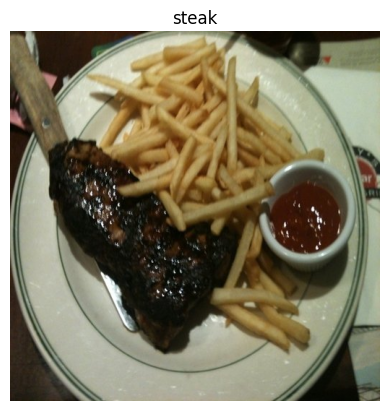

In [11]:
img = view_random_image(target_dir="pizza_steak/train/",target_class ="steak")

In [12]:
#build cnn
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(train_dir,batch_size=32,target_size=(224,224),class_mode="binary",seed=42)
valid_data = valid_datagen.flow_from_directory(test_dir,batch_size=32,target_size=(224,224),class_mode="binary",seed=42)



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [13]:
cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation='relu',input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding='valid'),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')


])

#compile the model

cnn_model.compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'])

In [14]:
history_1 = cnn_model.fit(train_data,epochs=5,steps_per_epoch=len(train_data))

Epoch 1/5
47/47 [==============================] - 114s 2s/step - loss: 0.5915 - accuracy: 0.6773
Epoch 2/5
47/47 [==============================] - 97s 2s/step - loss: 0.4272 - accuracy: 0.8047
Epoch 3/5
47/47 [==============================] - 98s 2s/step - loss: 0.3883 - accuracy: 0.8300
Epoch 4/5
47/47 [==============================] - 95s 2s/step - loss: 0.3683 - accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 105s 2s/step - loss: 0.3128 - accuracy: 0.8787


In [15]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

In [16]:
len(train_data)

47

In [17]:
#set random seed

tf.random.set_seed(42)

#create a model to replicate

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_2.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(),metrics = ["accuracy"])

history_2 = model_2.fit(train_data,epochs=5,steps_per_epoch = len(train_data),validation_data = valid_data,validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 14s 243ms/step - loss: 0.6956 - accuracy: 0.4800 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 14s 305ms/step - loss: 0.6932 - accuracy: 0.4947 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 11s 229ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 179ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 7s 156ms/step - loss: 0.6932 - accuracy: 0.4813 - val_loss: 0.6931 - val_accuracy: 0.5000


In [18]:
model_2.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_3.compile(loss="binary_crossentropy",optimizer = tf.keras.optimizers.Adam(),metrics=["accuracy"])

history_3 = model_3.fit(train_data,epochs=5,steps_per_epoch = len(train_data),validation_data = valid_data,validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 22s 451ms/step - loss: 3.5589 - accuracy: 0.6400 - val_loss: 1.3007 - val_accuracy: 0.5340
Epoch 2/5
47/47 [==============================] - 20s 429ms/step - loss: 0.9191 - accuracy: 0.6773 - val_loss: 0.5613 - val_accuracy: 0.7320
Epoch 3/5
47/47 [==============================] - 21s 442ms/step - loss: 0.5838 - accuracy: 0.7493 - val_loss: 0.7059 - val_accuracy: 0.7460
Epoch 4/5
47/47 [==============================] - 27s 566ms/step - loss: 0.6759 - accuracy: 0.7700 - val_loss: 0.7227 - val_accuracy: 0.7680
Epoch 5/5
47/47 [==============================] - 27s 563ms/step - loss: 0.6936 - accuracy: 0.7500 - val_loss: 0.7522 - val_accuracy: 0.7260


In [20]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Image shape : {img.shape}
Image shape : {img.shape}


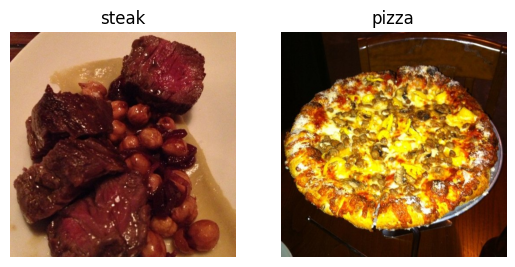

In [21]:
#Binary Classification :
'''
1.Becoma one with data(visualize)
2.Preprocess(scaling,normalizing)
3.Create a model(baseline)
4.fit the model
5.evaluate the model
6.Adjust different parameters and imporve the model
7.Repeat until satisfied

'''

import matplotlib.pyplot as plt
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/","pizza")

In [22]:
#preparing to load the data

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [23]:
# A batch is a small subset of data ,rather than look all the images at one time ,a model might look at 32 at a time .
'''
It does this for many reasons
1.10,000 images might not fit into the memory at your processor
2.Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well
minibatch size is 32(founder of CNN - Yann LeCun)
'''

# create  a train and test data generatirs and rescale the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale =1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)



In [24]:
#load the image data from directories
train_data = train_datagen.flow_from_directory(directory = train_dir,target_size=(224,224),class_mode="binary",batch_size=32)
test_data = test_datagen.flow_from_directory(directory = test_dir,target_size=(224,224),class_mode="binary",batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [25]:
model_4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,strides=1,padding="valid",input_shape=(224,224,3),activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

In [26]:
model_4.compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'])

In [27]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
#len of training and testing data

len(train_data),len(test_data)

(47, 16)

In [29]:
history_4 = model_4.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data = test_data,validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 122s 3s/step - loss: 1.2104 - accuracy: 0.5707 - val_loss: 0.6123 - val_accuracy: 0.6540
Epoch 2/5
47/47 [==============================] - 131s 3s/step - loss: 0.5315 - accuracy: 0.7467 - val_loss: 0.4465 - val_accuracy: 0.7900
Epoch 3/5
47/47 [==============================] - 130s 3s/step - loss: 0.4195 - accuracy: 0.8120 - val_loss: 0.3981 - val_accuracy: 0.8340
Epoch 4/5
47/47 [==============================] - 134s 3s/step - loss: 0.3127 - accuracy: 0.8827 - val_loss: 0.3834 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 129s 3s/step - loss: 0.1664 - accuracy: 0.9480 - val_loss: 0.4692 - val_accuracy: 0.8160


In [30]:
#Evaluate the model
import pandas as pd

pd.DataFrame(history_1.history)

,loss,accuracy
0,0.591528,0.677333
1,0.427218,0.804667
2,0.388292,0.830000
3,0.368309,0.842000
4,0.312776,0.878667


In [42]:
def plot_loss_curves(history):
  """
  returns separate loss curve for training and validation metrics
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  accuracy = history.history["accuracy"]
  val_acc = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label="val_loss")

  plt.plot(epochs,accuracy,label="training_accuracy")
  plt.plot(epochs,val_acc,label="val_accuracy")

In [32]:
cnn_model.evaluate(test_data)

16/16 [==============================] - 10s 619ms/step - loss: 0.3097 - accuracy: 0.8700


[0.3096962571144104, 0.8700000047683716]

In [33]:
model_2.evaluate(test_data)


16/16 [==============================] - 2s 127ms/step - loss: 0.6931 - accuracy: 0.5000


[0.6931472420692444, 0.5]

In [34]:
model_3.evaluate(test_data)

16/16 [==============================] - 2s 126ms/step - loss: 0.7522 - accuracy: 0.7260


[0.7521878480911255, 0.7260000109672546]

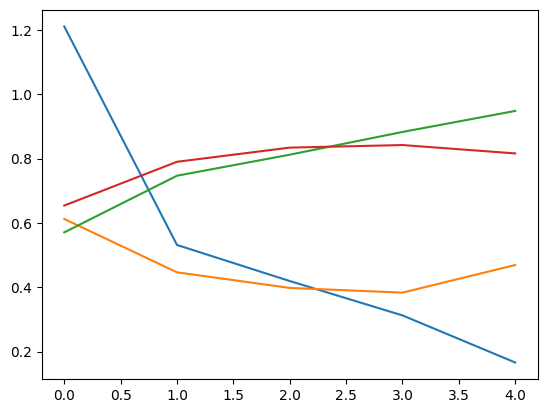

In [35]:
plot_loss_curves(history_4)

In [36]:
model_5  = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

In [37]:
model_5.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [38]:
history_5 = model_5.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 57s 1s/step - loss: 0.6555 - accuracy: 0.6313 - val_loss: 0.6011 - val_accuracy: 0.6540
Epoch 2/5
47/47 [==============================] - 50s 1s/step - loss: 0.4944 - accuracy: 0.7693 - val_loss: 0.3664 - val_accuracy: 0.8520
Epoch 3/5
47/47 [==============================] - 52s 1s/step - loss: 0.4220 - accuracy: 0.8153 - val_loss: 0.3361 - val_accuracy: 0.8640
Epoch 4/5
47/47 [==============================] - 58s 1s/step - loss: 0.3869 - accuracy: 0.8353 - val_loss: 0.3674 - val_accuracy: 0.8380
Epoch 5/5
47/47 [==============================] - 53s 1s/step - loss: 0.3868 - accuracy: 0.8427 - val_loss: 0.3491 - val_accuracy: 0.8640


In [39]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 26, 26, 10)       

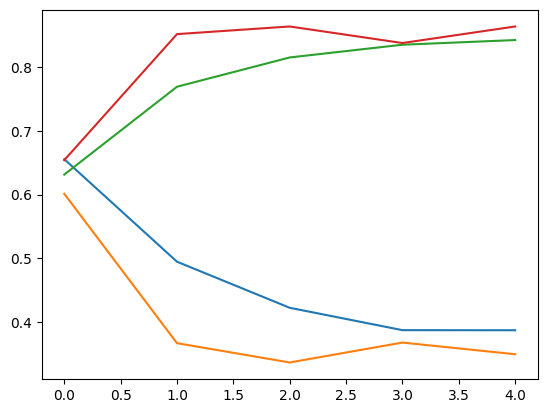

In [40]:
plot_loss_curves(history_5)

In [41]:
#opening our bag of tricks and fighting data augumentation
#create imgedatagenerator training instance

train_datagen_augmented = ImageDataGenerator(rescale=1/255.,rotation_range=0.2,shear_range=0.2,zoom_range=0.2,width_shift_range=0.2,height_shift_range=0.3,horizontal_flip=True)

#create image data geberator

train_datagen = ImageDataGenerator(rescale=1/255.)

#create test gen
test_datagen = ImageDataGenerator(rescale=1/255.)

In [42]:
#import data and augment it from training directory

print("Augumented training data")
train_data_augumented = train_datagen_augmented.flow_from_directory(train_dir,target_size=(224,224),batch_size=32,class_mode="binary",shuffle=False)

Augumented training data
Found 1500 images belonging to 2 classes.


In [43]:
#create non augumented data

train_data = train_datagen.flow_from_directory(train_dir,target_size=(224,224),batch_size=32,class_mode="binary",shuffle=False)

Found 1500 images belonging to 2 classes.


In [44]:
print("non augumented test data")
IMG_SIZE=(224,224)
test_data = test_datagen.flow_from_directory(test_dir,target_size=IMG_SIZE,batch_size=32,class_mode="binary")

non augumented test data
Found 500 images belonging to 2 classes.


In [45]:
#Get sample augumented data batches


In [46]:
images,labels = train_data.next()
augumented_images, augumented_labels = train_data_augumented.next()

Text(0.5, 1.0, 'augumented images')

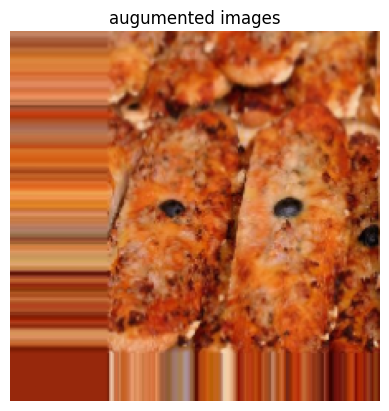

In [47]:
import random
random_number = random.randint(0,32)
plt.imshow(images[random_number])
plt.title("original image")
plt.axis(False)

plt.imshow(augumented_images[random_number])
plt.title("augumented images")


In [48]:
#create a model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")

] )

model_6.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])



In [49]:
history_6 = model_6.fit(train_data_augumented,epochs=5,steps_per_epoch = len(train_data_augumented),validation_data=test_data,validation_steps=len(test_data) )

Epoch 1/5
47/47 [==============================] - 71s 1s/step - loss: 0.7044 - accuracy: 0.4040 - val_loss: 0.6910 - val_accuracy: 0.5520
Epoch 2/5
47/47 [==============================] - 71s 1s/step - loss: 0.6918 - accuracy: 0.5500 - val_loss: 0.6781 - val_accuracy: 0.5520
Epoch 3/5
47/47 [==============================] - 70s 1s/step - loss: 0.6949 - accuracy: 0.5320 - val_loss: 0.6836 - val_accuracy: 0.7360
Epoch 4/5
47/47 [==============================] - 73s 2s/step - loss: 0.6709 - accuracy: 0.6240 - val_loss: 0.6907 - val_accuracy: 0.5080
Epoch 5/5
47/47 [==============================] - 74s 2s/step - loss: 0.6833 - accuracy: 0.5940 - val_loss: 0.5973 - val_accuracy: 0.7220


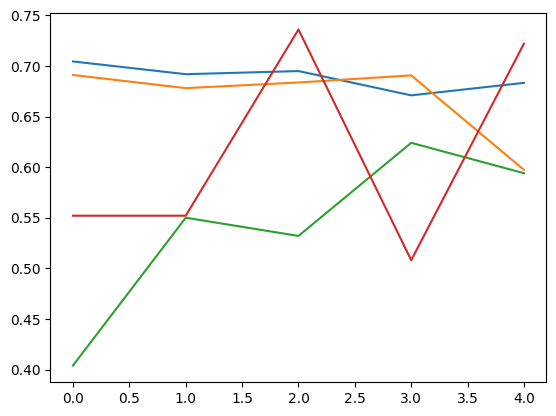

In [50]:
plot_loss_curves(history_6)

In [51]:
#Lets shuffle the training data

#import data and augument it and shuffle it from training directory

train_data_augumented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,target_size=(224,224),batch_size=32,class_mode="binary",shuffle=True)

Found 1500 images belonging to 2 classes.


In [52]:
#create a model as model 5 and model 6

model_7 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

In [58]:
model_7.compile(optimizer='adam', loss='categorical_crossentropy',metrics =['accuracy'])

In [59]:
history_7 = model_7.fit(train_data_augumented_shuffled,epochs=5,steps_per_epoch=len(train_data_augumented_shuffled),validation_data=test_data,validation_steps=len(test_data))

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


47/47 [==============================] - 73s 2s/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 74s 2s/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 70s 1s/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 66s 1s/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 68s 1s/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5000


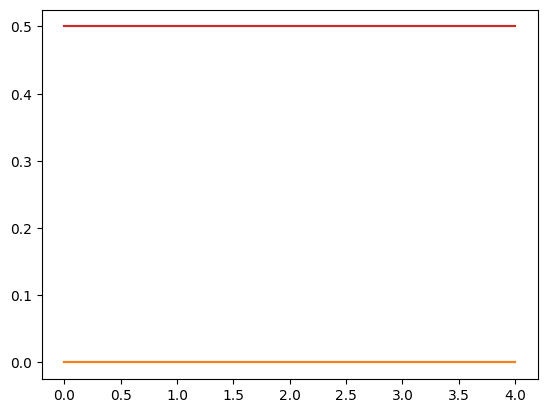

In [60]:
plot_loss_curves(history_7)

In [62]:
#Making a prediction with our trained model on cutsom data


(-0.5, 511.5, 383.5, -0.5)

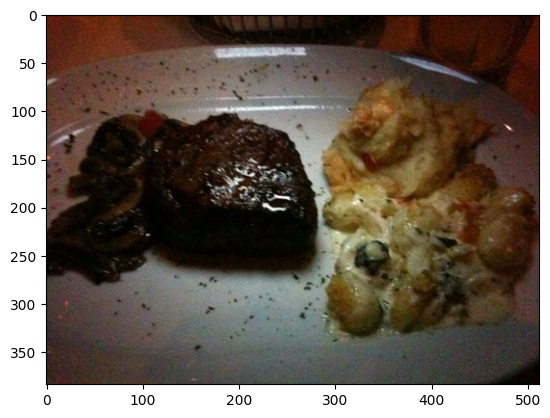

In [66]:
#view an example
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image
steak = Image.open("steak.jpg")
plt.imshow(steak)
plt.axis()


In [72]:
steak = Image.open("steak.jpg")
steak.size

(512, 384)

In [74]:
steak = np.array(steak)

In [76]:
steak = tf.image.resize(steak,(224,224))

In [80]:
from PIL import Image
import numpy as np
from tensorflow.keras.applications.vgg16 import preprocess_input

steak = Image.open("steak.jpg")
input_size = (224, 224)
steak_resized = steak.resize(input_size)
steak_array = np.array(steak_resized)
steak_array = np.expand_dims(steak_array, axis=0)
steak_array = preprocess_input(steak_array)
predictions = model_7.predict(steak_array)
print(predictions)


1/1 [==============================] - 0s 196ms/step
[[0.]]


In [81]:
#when you train a nn ,to make a prediction with it on your own custom data ,the data is preprocessed into the same format as data type

In [41]:
def load_and_prep_image(filename,img_shape=224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img,size=[img_shape,img_shape])
  img = img/255.
  return img

In [83]:
steak = load_and_prep_image("steak.jpg")

In [101]:
pred_1=model_4.predict(tf.expand_dims(steak,axis=0))

1/1 [==============================] - 0s 83ms/step


In [86]:
pizza = load_and_prep_image("pizza.jpg")

In [99]:
pred = model_5.predict(tf.expand_dims(pizza,axis=0))

1/1 [==============================] - 0s 37ms/step


In [97]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [103]:
#we can index the predicte class by rounding the prediction

pred_class = class_names[int(tf.round(pred_1))]
pred_class

'steak'

In [ ]:
def pred_And_plt(model,file_name,class_names=class_names):
  #import the trget image and preprocess it
  img = load_and_prep_image(file_name)
  #make prediction
  pred = model.predict(tf.expand_dims(img,axis=0))
  print(len(pred[0]))
  print(tf.argmax(pred))
  if len(pred[0])>1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred))]

  plt.imshow(img)
  plt.title(pred_class)
  plt.axis(False)

1/1 [==============================] - 0s 50ms/step


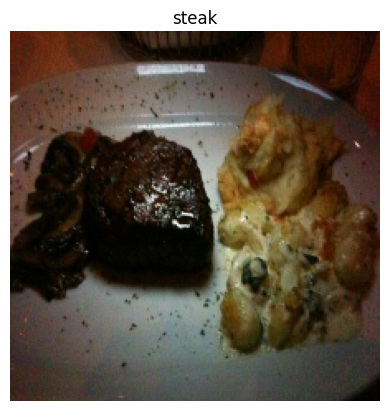

In [107]:
pred_And_plt(model_6,"steak.jpg")

## Multi Class Classification

In [1]:
import zipfile

# Download zip file of 10_food_classes images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2024-01-25 17:43:47--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.167.207, 142.251.179.207, 142.251.16.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.167.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  97.3MB/s    in 6.1s    

2024-01-25 17:43:53 (81.4 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
import os

for dirpath,dirname,filenames in os.walk("10_food_classes_all_data"):
  print(f"there are {len(dirpath)} and {len(dirname)} and files of {len(filenames)}")

there are 24 and 2 and files of 0
there are 29 and 10 and files of 0
there are 43 and 0 and files of 250
there are 43 and 0 and files of 250
there are 35 and 0 and files of 250
there are 39 and 0 and files of 250
there are 35 and 0 and files of 250
there are 35 and 0 and files of 250
there are 35 and 0 and files of 250
there are 39 and 0 and files of 250
there are 40 and 0 and files of 250
there are 44 and 0 and files of 250
there are 30 and 10 and files of 0
there are 44 and 0 and files of 750
there are 44 and 0 and files of 750
there are 36 and 0 and files of 750
there are 40 and 0 and files of 750
there are 36 and 0 and files of 750
there are 36 and 0 and files of 750
there are 36 and 0 and files of 750
there are 40 and 0 and files of 750
there are 41 and 0 and files of 750
there are 45 and 0 and files of 750


In [3]:
#set the train and test directories

train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [4]:
#visualize
import random
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_name = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_name)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [8]:
import random
img = view_random_image(target_dir=train_dir,target_class= random.choice(class_name))

NameError: name 'view_random_image' is not defined

In [6]:
import matplotlib.pyplot as plt
def plot_loss_curves(history):
  """
  returns separate loss curve for training and validation metrics
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  accuracy = history.history["accuracy"]
  val_acc = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label="val_loss")

  plt.plot(epochs,accuracy,label="training_accuracy")
  plt.plot(epochs,val_acc,label="val_accuracy")

In [9]:
#Preprocessing the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE=(224,224)
#rescale
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

#load data in from directories

train_data = train_datagen.flow_from_directory(train_dir,target_size=(224,224),batch_size=32,class_mode='categorical')

test_data = test_datagen.flow_from_directory(test_dir,target_size=(224,224),batch_size=32,class_mode='categorical')


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [10]:
#create a model(from baseline)

import tensorflow as tf
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Activation
from tensorflow.keras.models import Sequential

In [11]:
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model


In [12]:
model_8.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [13]:
#fit the model

history_8 = model_8.fit(train_data,epochs=5,steps_per_epoch = len(train_data),validation_data=test_data,validation_steps=int(0.25*len(test_data)))

Epoch 1/5
235/235 [==============================] - 448s 2s/step - loss: 2.1684 - accuracy: 0.2109 - val_loss: 1.9748 - val_accuracy: 0.2747
Epoch 2/5
235/235 [==============================] - 437s 2s/step - loss: 1.9073 - accuracy: 0.3321 - val_loss: 1.9163 - val_accuracy: 0.3224
Epoch 3/5
235/235 [==============================] - 443s 2s/step - loss: 1.6314 - accuracy: 0.4464 - val_loss: 1.8881 - val_accuracy: 0.3405
Epoch 4/5
235/235 [==============================] - 471s 2s/step - loss: 1.2245 - accuracy: 0.5935 - val_loss: 2.0963 - val_accuracy: 0.3010
Epoch 5/5
235/235 [==============================] - 510s 2s/step - loss: 0.7604 - accuracy: 0.7491 - val_loss: 2.7447 - val_accuracy: 0.3043


In [14]:
len(train_data)

235

In [15]:
model_8.evaluate(test_data)

79/79 [==============================] - 59s 737ms/step - loss: 2.6918 - accuracy: 0.2928


[2.6918013095855713, 0.29280000925064087]

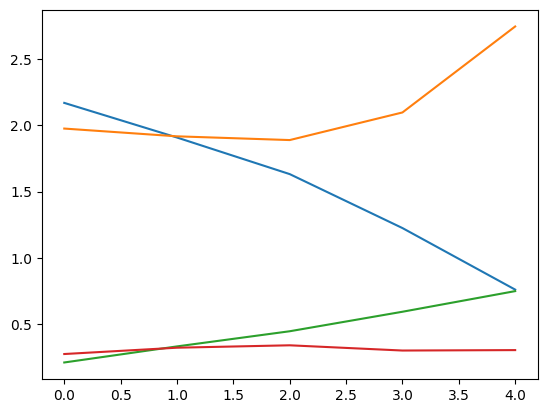

In [16]:
#check out the model loss curves

plot_loss_curves(history_8)

In [17]:
#adjust the model hyper parameters(to beat the baseline/reduce overfitting)
#due to its performance pon training data ,it clear that model is learning something ,it is not generalizing well on inseen data

In [20]:
model_9 = Sequential([
    Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation='softmax')
])
model_9.compile(optimizer=tf.keras.optimizers.Adam(),loss='categorical_crossentropy',metrics=['accuracy'])


In [21]:
history_9 = model_9.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 256s 1s/step - loss: 2.0987 - accuracy: 0.2508 - val_loss: 1.9132 - val_accuracy: 0.3420
Epoch 2/5
235/235 [==============================] - 228s 970ms/step - loss: 1.8009 - accuracy: 0.3879 - val_loss: 1.8309 - val_accuracy: 0.3460
Epoch 3/5
235/235 [==============================] - 226s 960ms/step - loss: 1.4985 - accuracy: 0.5031 - val_loss: 1.9337 - val_accuracy: 0.3364
Epoch 4/5
235/235 [==============================] - 211s 898ms/step - loss: 1.0995 - accuracy: 0.6492 - val_loss: 2.2003 - val_accuracy: 0.3032
Epoch 5/5
235/235 [==============================] - 228s 972ms/step - loss: 0.7175 - accuracy: 0.7792 - val_loss: 2.3808 - val_accuracy: 0.3132


In [22]:
model_9.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 29160)             0         
                                                                 
 dense_3 (Dense)             (None, 10)               

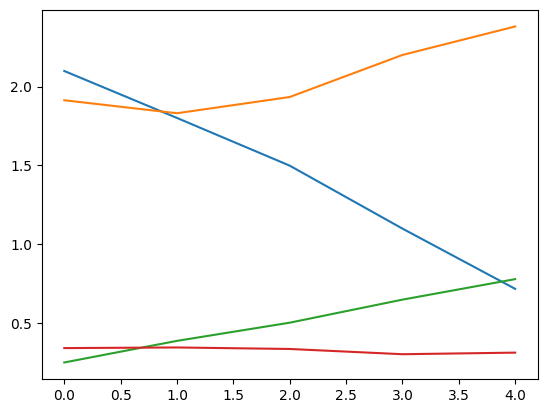

In [23]:
plot_loss_curves(history_9)

In [25]:
#Trying to reduce overfitting and data augumentation
'''
Let's try and improve out model's results by using augumented training data
1.Reduce overfitting
2.Improve validation accuracy
'''


"\nLet's try and improve out model's results by using augumented training data\n1.Reduce overfitting \n2.Improve validation accuracy\n"

In [28]:
#create data augumentation

train_datagen_augumented = ImageDataGenerator(rescale=1/255.,rotation_range=0.2,width_shift_range=0.2,height_shift_range=0.2,zoom_range=0.2,horizontal_flip=True)

train_data_augumented = train_datagen_augumented.flow_from_directory(train_dir,target_size=(224,224),batch_size=32,class_mode='categorical')


Found 7500 images belonging to 10 classes.


In [30]:
model_10 = tf.keras.models.clone_model(model_8)

model_10.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [31]:
model_10.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

In [34]:
history_10 = model_10.fit(train_data_augumented,epochs=5,steps_per_epoch=len(train_data_augumented),validation_data=test_data,validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 558s 2s/step - loss: 2.2963 - accuracy: 0.1145 - val_loss: 2.2327 - val_accuracy: 0.1896
Epoch 2/5
235/235 [==============================] - 583s 2s/step - loss: 2.1690 - accuracy: 0.2100 - val_loss: 2.0101 - val_accuracy: 0.2792
Epoch 3/5
235/235 [==============================] - 626s 3s/step - loss: 2.0810 - accuracy: 0.2528 - val_loss: 1.9379 - val_accuracy: 0.3140
Epoch 4/5
235/235 [==============================] - 546s 2s/step - loss: 2.0303 - accuracy: 0.2856 - val_loss: 1.9414 - val_accuracy: 0.3296
Epoch 5/5
235/235 [==============================] - 582s 2s/step - loss: 1.9805 - accuracy: 0.3040 - val_loss: 1.8525 - val_accuracy: 0.3548


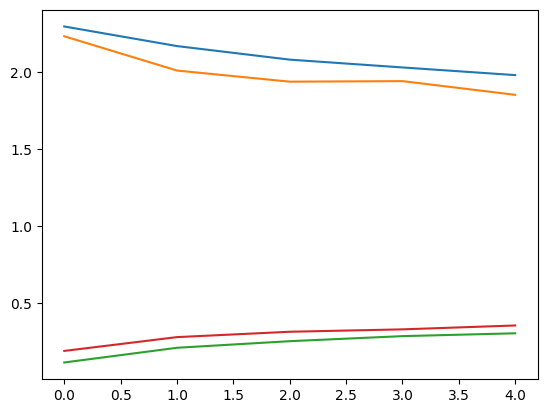

In [37]:
plot_loss_curves(history_10)

In [35]:
model_8.evaluate(test_data)

79/79 [==============================] - 47s 590ms/step - loss: 2.6918 - accuracy: 0.2928


[2.6918015480041504, 0.29280000925064087]

In [36]:
model_10.evaluate(test_data)

79/79 [==============================] - 47s 591ms/step - loss: 1.8525 - accuracy: 0.3548


[1.85249924659729, 0.3547999858856201]

In [39]:
# -q is for "quiet"
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

In [43]:
pred_and_plot(model_10, "03-sushi.jpeg", class_names)

NameError: name 'pred_and_plot' is not defined

In [ ]:
pred_and_plot(model_10, "03-pizza-dad.jpeg", class_names)

In [ ]:
#save and loading amodel

model_10.save("saved_trained_model_10")

In [ ]:
#load model
load_model_10 = tf.keras.models.load_model("saved_trained_model_10")
load_model_10.evaluate(test_data)

In [ ]:
model_10.evaluate(test_data)